## Plotting a histogram

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
df = pd.read_csv('data/product_purchases.csv')
print(df.head())
print(df.shape)

     id  nps_score  subscribed_to_newsletter    interests  number_of_purchases
0  1462        3.0                     False  Fly Fishing                    8
1  1491        2.0                      True  Fly Fishing                   14
2  1492        NaN                      True  Fly Fishing                   13
3  1551        NaN                     False  Fly Fishing                   12
4  1553        NaN                     False  Fly Fishing                   10
(1000, 5)


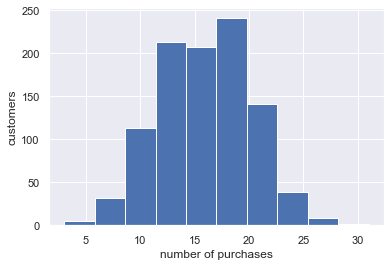

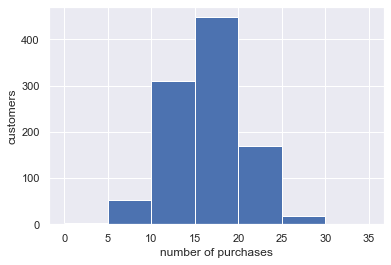

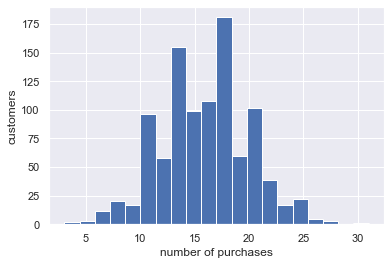

In [83]:
# plotting with seaborn
sns.set() #default settings
plt.hist(df['number_of_purchases'])
plt.xlabel('number of purchases')
plt.ylabel('customers')
plt.show()

# setting bin edges
bin_edges = [0,5,10,15,20,25,30,35]

plt.hist(df['number_of_purchases'], bins=bin_edges)
plt.xlabel('number of purchases')
plt.ylabel('customers')
plt.show()

# setting bins parameter to single number
plt.hist(df['number_of_purchases'], bins=20)
plt.xlabel('number of purchases')
plt.ylabel('customers')
plt.show()

In [84]:
# Compute number of data points: n_data
n_data = len(df['number_of_purchases'])
print(n_data)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data) # also can calc square root with n_data**(1/2.0)
n_bins = int(n_bins) # bins requires integer
print(n_bins)

1000
31


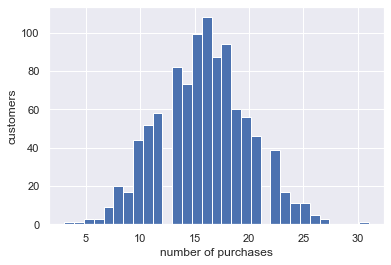

In [85]:
plt.hist(df['number_of_purchases'], bins=n_bins)
plt.xlabel('number of purchases')
plt.ylabel('customers')
plt.show()

Be careful about binning bias. The same data may be interpreted differntly depending on choice of bins.

## Bee swarm plot 
Unlike a histogram, a swarm plot shows all of the values instead of binning them.
Your DataFrame must be organized such that each column is a feature and each row is an observation.

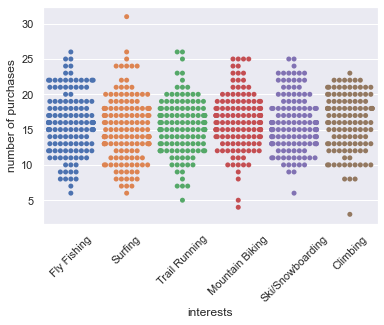

In [86]:
sns.swarmplot(x='interests', y='number_of_purchases', data=df)
plt.xlabel('interests')
plt.ylabel('number of purchases')
plt.xticks(rotation=45) #rotate x-axis labels by 45 degrees.
plt.show()

## Empirical cumulative distribution function (ECDF)
An x-value is the quantity you are measuring. The y-value is the fraction of data points that have a value smaller than the corresponding x-value.

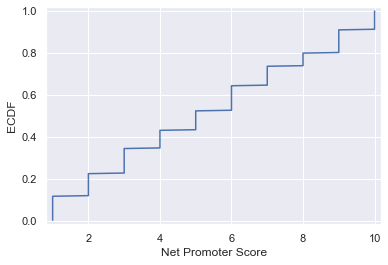

In [36]:
# x-axis is the sorted data
x = np.sort(df['nps_score'].dropna())
# y-axis is evenly spaced data points with a maximum of 1
y = np.arange(1, len(x)+1) / len(x)

# plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x,y)
plt.xlabel('Net Promoter Score')
plt.ylabel('ECDF')

plt.margins(0.02) # Keeps data off plot edges
plt.show()

In the above plot, ECDF shows the fraction of NPS responses received corresponding to a NPS value.
* ~65% of responses are a 6 or lower.

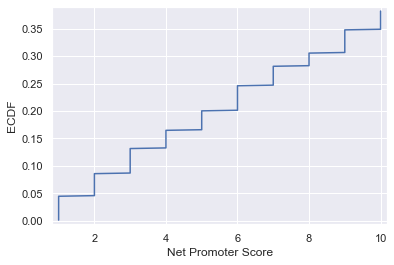

In [38]:
# ECDF Function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

# Build ECDF plot
x_axis, y_axis = ecdf(df['nps_score'])
_ = plt.plot(x_axis,y_axis)
plt.xlabel('Net Promoter Score')
plt.ylabel('ECDF')

plt.margins(0.02) # Keeps data off plot edges
plt.show()

## Computing percentiles

In [39]:
percentiles = np.array([2.5, 25, 50, 75, 97.5]) # specify percentiles
ptiles = np.percentile(df['number_of_purchases'], percentiles)

print(ptiles)

[ 2. 17. 36. 67. 97.]


## Box Plots

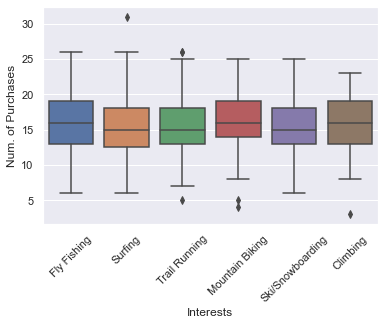

In [87]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='interests',y='number_of_purchases', data=df)

# Label the axes
plt.xlabel('Interests')
plt.ylabel('Num. of Purchases')
plt.xticks(rotation=45) #rotate x-axis labels by 45 degrees.

# Show the plot
plt.show()


## Variance and Standard Deviation
#### Variance
* The mean squared distance of the data from their mean
* Informally, a measure of the spread of data


In [88]:
# Group number of purchases by interest and compute the variance
var = df.groupby('interests')['number_of_purchases'].var()
print(var)

interests
Climbing            15.734391
Fly Fishing         18.412383
Mountain Biking     15.436894
Ski/Snowboarding    14.423787
Surfing             19.814833
Trail Running       14.770154
Name: number_of_purchases, dtype: float64


#### Standard Deviation
Squareroot of the variance

In [89]:
np.sqrt(var)

interests
Climbing            3.966660
Fly Fishing         4.290965
Mountain Biking     3.928981
Ski/Snowboarding    3.797866
Surfing             4.451386
Trail Running       3.843196
Name: number_of_purchases, dtype: float64

In [75]:
pur_values = np.asarray(np.round(s,0),dtype=int)
    
print(pur_values[0:20])
# np.savetxt('data/purchases.csv', pur_values, delimiter=",")

[7 7 9 7 7 9 6 6 7 7 6 7 7 8 5 6 8 9 5 8]
